# **Mô tả các cột như sau:**


About dataset

The dataset contains 20 variables and 12999 observation.

The dataset contains text and metadata from 244 websites and represents 12,999 posts in total of 30 days. The data was pulled using the webhose.io API. Data sources that were missing a label were simply assigned a label of "bs".

uuid - Unique identifier

ord_in_thread

author - author of story

published - date published

title - title of the story

text - text of story

language - data from webhose.io

crawled - date the story was archived

site_url - site URL from BS detector

country - data from webhose.io

domain_rank - data from webhose.io

thread_title

spam_score - data from webhose.io

main_img_url - image from story

replies_count - number of replies

participants_count - number of participants

likes - number of Facebook likes

comments - number of Facebook comments

shares - number of Facebook shares

type - type of website (label from BS detector)


uuid - Mã định danh duy nhất

thứ tự trong chủ đề

tác giả - tác giả của câu chuyện

xuất bản - ngày xuất bản

tiêu đề - tiêu đề của câu chuyện

văn bản - văn bản của câu chuyện

ngôn ngữ - dữ liệu từ webhose.io

được thu thập thông tin - ngày câu chuyện được lưu trữ

site_url - URL trang web từ trình phát hiện BS

quốc gia - dữ liệu từ webhose.io

thứ hạng tên miền - dữ liệu từ webhose.io

tiêu đề chủ đề

điểm thư rác - dữ liệu từ webhose.io

main_img_url - hình ảnh từ câu chuyện

Reply_count - số lượng câu trả lời

người tham gia_count - số lượng người tham gia

lượt thích - số lượt thích trên Facebook

bình luận - số lượng bình luận trên Facebook

lượt chia sẻ - số lượt chia sẻ trên Facebook

type - loại trang web (nhãn từ máy dò BS)

# **Nguồn dữ liệu**

Dữ liệu được lấy từ trang [kaggle.com](https://www.kaggle.com/), cụ thể tại [đây](https://www.kaggle.com/datasets/mrisdal/fake-news/data)





# **Các thư viện**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

Mounted at /content/drive


# **Đọc dữ liệu**

In [ ]:
fake_new_df = pd.read_csv("/content/drive/MyDrive/PHAN_TICH_DU_LIEU/fake.csv")
fake_new_df

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


# **Tiền xử lý dữ liệu**

## **Xem thông tin trước khi xử lý dữ liệu**

In [ ]:
# Hiển thị thông tin của bộ dữ liệu
fake_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [ ]:
# Xem các thông số thống kê của bộ dữ liệu.
fake_new_df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [ ]:
# Xem số lượng dòng, cột của bộ dữ liệu.
fake_new_df.shape

(12999, 20)

## **Làm sạch dữ liệu**

In [ ]:
# Xóa các cột không cần thiết
fake_new_df.drop(['domain_rank', 'thread_title', 'main_img_url'], axis = 1, inplace = True)
# Chuẩn hóa dữ liệu của DataFrame df
fake_new_df.rename(columns={'uuid':'id'},inplace=True)

In [ ]:
# Chuyển đổi cột published và crawled từ object sang ngày giờ
fake_new_df['published']=pd.to_datetime(fake_new_df['published'],utc=True)
fake_new_df['crawled']=pd.to_datetime(fake_new_df['crawled'],utc=True)

In [ ]:
# Thêm vào cột 'crawled_by_day' dựa vào cột 'crawled'
fake_new_df.insert(8,'crawled_by_day',pd.to_datetime(fake_new_df['crawled'],utc=True).dt.strftime('%Y-%m-%d'))
# Thêm vào cột 'published_by_day' dựa vào cột "published"
fake_new_df.insert(4,'published_by_day',pd.to_datetime(fake_new_df['published'],utc=True).dt.strftime('%Y-%m-%d'))

In [ ]:
# Chuyển đổi chữ cái đầu tiên của mỗi từ trong chuỗi thành chữ cái in hoa trong danh sách cột
fake_new_df.columns = fake_new_df.columns.str.capitalize()

In [ ]:
# Kiểu tra giá trị trùng lặp
fake_new_df.duplicated().sum()

0

In [ ]:
# Kiểm tra giá trị null
fake_new_df.isnull().sum()

Id                       0
Ord_in_thread            0
Author                2424
Published                0
Published_by_day         0
Title                  680
Text                    46
Language                 0
Crawled                  0
Crawled_by_day           0
Site_url                 0
Country                176
Spam_score               0
Replies_count            0
Participants_count       0
Likes                    0
Comments                 0
Shares                   0
Type                     0
dtype: int64

In [ ]:
# Điền giá trị 0
fake_new_df = fake_new_df.fillna(0)
# Thay thế các ký tự trắng " ", thành 0
fake_new_df = fake_new_df.replace(" ", 0)
# Xóa các dòng có giá trị trong cột Author, Title, Text, Country bằng 0
fake_new_df = fake_new_df[fake_new_df['Author'] != 0]
fake_new_df = fake_new_df[fake_new_df['Title'] != 0]
fake_new_df = fake_new_df[fake_new_df['Text'] != 0]
fake_new_df = fake_new_df[fake_new_df['Country'] != 0]

In [ ]:
# Thay đổi Id của cột thành một chuỗi Id mới tự động tăng từ 1
fake_new_df['Id'] = range(1, len(fake_new_df) + 1)

In [ ]:
fake_new_df

,Id,Ord_in_thread,Author,Published,Published_by_day,Title,Text,Language,Crawled,Crawled_by_day,Site_url,Country,Spam_score,Replies_count,Participants_count,Likes,Comments,Shares,Type
0,1,0,Barracuda Brigade,2016-10-26 18:41:00+00:00,2016-10-26,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-26 22:49:27.168000+00:00,2016-10-26,100percentfedup.com,US,0.000,0,1,0,0,0,bias
1,2,0,reasoning with facts,2016-10-29 05:47:11.259000+00:00,2016-10-29,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29 05:47:11.259000+00:00,2016-10-29,100percentfedup.com,US,0.000,0,1,0,0,0,bias
2,3,0,Barracuda Brigade,2016-10-30 23:41:49.479000+00:00,2016-10-30,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-30 23:41:49.479000+00:00,2016-10-30,100percentfedup.com,US,0.000,0,1,0,0,0,bias
3,4,0,Fed Up,2016-11-01 03:22:00+00:00,2016-11-01,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01 13:46:26.304000+00:00,2016-11-01,100percentfedup.com,US,0.068,0,0,0,0,0,bias
4,5,0,Fed Up,2016-11-01 19:56:00+00:00,2016-11-01,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01 21:59:42.266000+00:00,2016-11-01,100percentfedup.com,US,0.865,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,9702,0,Tyler Durden,2016-10-26 20:25:49.124000+00:00,2016-10-26,Stocks Pump'n'Dump As Crude Crumbles To 3-Week...,"Kaiser Sousa Oct 26, 2016 4:07 PM \nwhen i awo...",english,2016-10-26 20:25:49.124000+00:00,2016-10-26,zerohedge.com,US,0.000,0,1,14,0,14,bs
12909,9703,0,Tyler Durden,2016-10-26 20:53:43.161000+00:00,2016-10-26,Rules For Rulers (Or How The World Really Works),"The following video is a must watch, particula...",english,2016-10-26 20:53:43.161000+00:00,2016-10-26,zerohedge.com,US,0.000,0,1,72,0,72,bs
12910,9704,0,George Washington,2016-10-26 20:53:49.879000+00:00,2016-10-26,Fact Check: Trump Is Right that Clinton Might ...,She explains : \nHillary Clinton wants to star...,english,2016-10-26 20:53:49.879000+00:00,2016-10-26,zerohedge.com,US,0.000,0,1,333,0,333,bs
12911,9705,0,Tyler Durden,2016-10-26 21:20:00.111000+00:00,2016-10-26,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",english,2016-10-26 21:20:00.111000+00:00,2016-10-26,zerohedge.com,US,0.000,0,1,197,0,197,bs


In [ ]:
 #fake_new_df.to_csv('b.csv')

## **Xem thông tin sau khi xử lý dữ liệu**

In [ ]:
# Hiển thị thông tin của bộ dữ liệu
fake_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9706 entries, 0 to 12912
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Id                  9706 non-null   int64              
 1   Ord_in_thread       9706 non-null   int64              
 2   Author              9706 non-null   object             
 3   Published           9706 non-null   datetime64[ns, UTC]
 4   Published_by_day    9706 non-null   object             
 5   Title               9706 non-null   object             
 6   Text                9706 non-null   object             
 7   Language            9706 non-null   object             
 8   Crawled             9706 non-null   datetime64[ns, UTC]
 9   Crawled_by_day      9706 non-null   object             
 10  Site_url            9706 non-null   object             
 11  Country             9706 non-null   object             
 12  Spam_score          9706 non-null   fl

In [ ]:
# Xem các thông số thống kê của bộ dữ liệu.
fake_new_df.describe()

,Id,Ord_in_thread,Spam_score,Replies_count,Participants_count,Likes,Comments,Shares
count,9706.00000,9706.0,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000
mean,4853.50000,0.0,0.015003,0.005667,0.961261,9.960849,0.024109,9.960849
std,2802.02519,0.0,0.096754,0.209188,0.261063,76.883840,0.564296,76.883840
min,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2427.25000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4853.50000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7279.75000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,9706.00000,0.0,1.000000,17.000000,15.000000,988.000000,30.000000,988.000000


In [ ]:
# Xem số lượng dòng, cột của bộ dữ liệu.
fake_new_df.shape

(9706, 19)

In [ ]:
# Kiểm tra lại giá trị null
fake_new_df.isnull().sum()

Id                    0
Ord_in_thread         0
Author                0
Published             0
Published_by_day      0
Title                 0
Text                  0
Language              0
Crawled               0
Crawled_by_day        0
Site_url              0
Country               0
Spam_score            0
Replies_count         0
Participants_count    0
Likes                 0
Comments              0
Shares                0
Type                  0
dtype: int64

In [ ]:
# Kiểm tra lại giá trị trùng lặp
fake_new_df.duplicated().sum()

0

### **Thông tin số lần xuất hiện của mỗi giá trị sau khi xử lý dữ liệu**

In [ ]:
fake_new_df.Ord_in_thread.value_counts()

Ord_in_thread
0    9706
Name: count, dtype: int64

In [ ]:
fake_new_df.Author.value_counts()

Author
admin                                                         246
Editor                                                        100
Gillian                                                       100
Starkman                                                      100
Alex Ansary                                                   100
                                                             ... 
11 Things To Let Go Of Before The New Year – Motivate3.com      1
Jing Jin                                                        1
USA Today                                                       1
Millie Weaver                                                   1
George Washington                                               1
Name: count, Length: 1826, dtype: int64

In [ ]:
fake_new_df.Published.value_counts()

Published
2016-10-27 00:00:00+00:00           51
2016-10-28 00:00:00+00:00           31
2016-11-01 00:00:00+00:00           30
2016-10-26 00:00:00+00:00           25
2016-11-03 00:00:00+00:00           21
                                    ..
2016-11-08 21:11:51.854000+00:00     1
2016-11-07 23:31:00+00:00            1
2016-11-06 21:43:13.954000+00:00     1
2016-11-04 20:12:50.898000+00:00     1
2016-10-26 21:35:58.174000+00:00     1
Name: count, Length: 9100, dtype: int64

In [ ]:
fake_new_df.Published_by_day.value_counts()

Published_by_day
2016-10-27    1378
2016-10-28    1152
2016-10-26     693
2016-11-01     589
2016-11-02     577
2016-10-31     560
2016-10-29     550
2016-11-03     488
2016-11-04     399
2016-10-30     396
2016-11-07     309
2016-11-08     274
2016-11-09     236
2016-11-05     208
2016-11-06     200
2016-11-10     189
2016-11-11     174
2016-11-16     132
2016-11-14     129
2016-11-15     117
2016-11-12     109
2016-11-23     108
2016-11-17     106
2016-11-18      99
2016-11-21      99
2016-11-13      98
2016-11-22      95
2016-11-19      72
2016-11-24      66
2016-11-20      53
2016-11-25      50
2016-10-25       1
Name: count, dtype: int64

In [ ]:
fake_new_df.Title.value_counts()

Title
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence              6
Will Barack Obama Delay Or Suspend The Election If Hillary Is Forced Out By The New FBI Email Investigation?    5
Let’s Be Clear – A Vote For Warmonger Hillary Clinton Is A Vote For World War 3                                 5
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                        5
If Hillary Clinton Is Charged With Obstruction Of Justice She Could Go To Prison For 20 Years                   5
                                                                                                               ..
Trump’s Amazing Victory Against a Stacked Deck                                                                  1
Pope Francis: “…it is the communists who think like Christians”                                                 1
WATCH! Six Communists Arrested After Attacking Trump Supporters, Media Yawns (Vide

In [ ]:
fake_new_df.Language.value_counts()

Language
english       9325
spanish        146
german         108
russian         58
french          27
turkish          9
ignore           7
italian          7
arabic           5
portuguese       5
norwegian        3
greek            2
finnish          1
chinese          1
polish           1
dutch            1
Name: count, dtype: int64

In [ ]:
fake_new_df.Crawled.value_counts()

Crawled
2016-11-07 23:28:01.428000+00:00    2
2016-10-31 11:15:00.202000+00:00    1
2016-10-28 13:13:18.197000+00:00    1
2016-10-29 13:13:15.248000+00:00    1
2016-10-30 15:22:12.939000+00:00    1
                                   ..
2016-11-22 00:49:08.577000+00:00    1
2016-11-22 16:14:40.687000+00:00    1
2016-11-22 22:17:16.903000+00:00    1
2016-11-22 22:17:51.793000+00:00    1
2016-10-26 21:35:58.174000+00:00    1
Name: count, Length: 9705, dtype: int64

In [ ]:
fake_new_df.Crawled_by_day.value_counts()

Crawled_by_day
2016-10-27    1332
2016-10-28    1198
2016-10-26     634
2016-11-01     584
2016-10-29     574
2016-11-02     568
2016-10-31     561
2016-11-03     489
2016-11-04     380
2016-10-30     377
2016-11-07     311
2016-11-09     274
2016-11-05     249
2016-11-08     241
2016-11-06     197
2016-11-10     193
2016-11-11     184
2016-11-14     129
2016-11-16     127
2016-11-17     115
2016-11-23     111
2016-11-12     110
2016-11-15     109
2016-11-18     101
2016-11-13     101
2016-11-21      95
2016-11-22      90
2016-11-25      74
2016-11-19      70
2016-11-20      66
2016-11-24      62
Name: count, dtype: int64

In [ ]:
fake_new_df.Site_url.value_counts()

Site_url
thedailysheeple.com         100
conservativetribune.com     100
thecommonsenseshow.com      100
naturalblaze.com            100
nakedcapitalism.com         100
                           ... 
therundownlive.com            1
educateinspirechange.org      1
blacklistednews.com           1
opednews.com                  1
reductress.com                1
Name: count, Length: 181, dtype: int64

In [ ]:
fake_new_df.Country.value_counts()

Country
US    8433
GB     542
RU     124
EU     111
TV     101
ES     100
IS      93
DE      62
FR      36
NL      34
ME      34
IN      23
BG       6
CA       3
ZA       2
CO       1
SE       1
Name: count, dtype: int64

In [ ]:
fake_new_df.Spam_score.value_counts()

Spam_score
0.000    9083
0.001      41
0.003      22
0.002      16
1.000      11
         ... 
0.904       1
0.164       1
0.868       1
0.508       1
0.302       1
Name: count, Length: 299, dtype: int64

In [ ]:
fake_new_df.Replies_count.value_counts()

Replies_count
0     9688
1       10
5        2
2        2
4        2
17       1
6        1
Name: count, dtype: int64

In [ ]:
fake_new_df.Participants_count.value_counts()

Participants_count
1     9276
0      415
2        9
5        3
3        2
15       1
Name: count, dtype: int64

In [ ]:
fake_new_df.Likes.value_counts()

Likes
0      9376
3         9
1         8
2         5
12        5
       ... 
328       1
696       1
87        1
397       1
714       1
Name: count, Length: 231, dtype: int64

In [ ]:
fake_new_df.Comments.value_counts()

Comments
0     9668
3        8
1        6
2        5
4        4
9        3
8        2
17       2
7        2
5        2
6        1
26       1
30       1
15       1
Name: count, dtype: int64

In [ ]:
fake_new_df.Shares.value_counts()

Shares
0      9376
3         9
1         8
2         5
12        5
       ... 
328       1
696       1
87        1
397       1
714       1
Name: count, Length: 231, dtype: int64

In [ ]:
fake_new_df.Type.value_counts()

Type
bs            8787
bias           288
conspiracy     269
hate           245
junksci         97
fake            14
state            6
Name: count, dtype: int64

# **Trực quan hóa dữ liệu**

<ipython-input-148-a7c85c677669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type",data=fake_new_df,palette="ch:s=.25,rot=-.25")


<Axes: xlabel='Type', ylabel='count'>

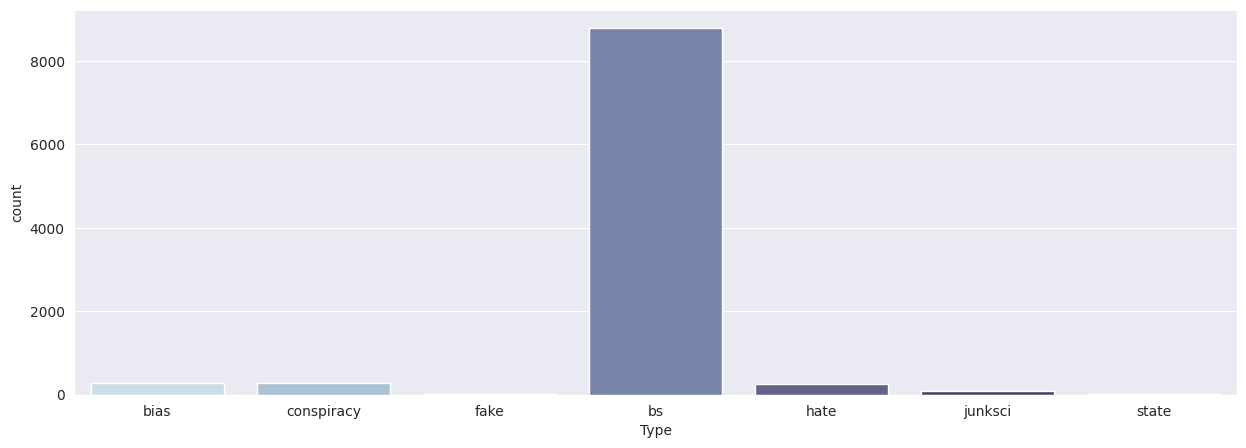

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Type",data=fake_new_df,palette="ch:s=.25,rot=-.25")

<ipython-input-149-450b1b0af94b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language',data=fake_new_df,palette='flare')


<Axes: xlabel='Language', ylabel='count'>

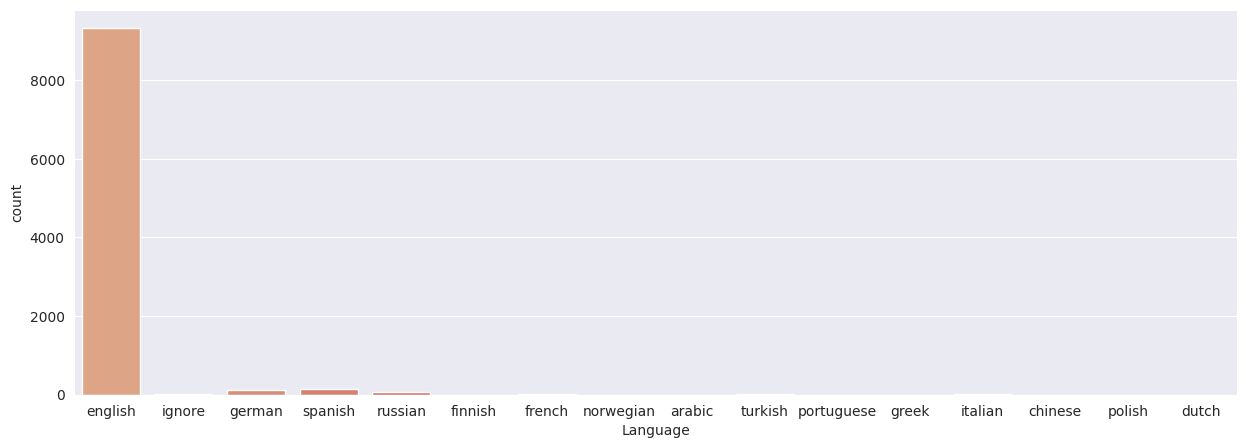

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=fake_new_df,palette='flare')
# Tiếng Anh là ngôn ngữ được sử dụng nhiều nhất trong dữ liệu

<ipython-input-150-af5a37d76c56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country',data=fake_new_df,palette='blend:#7AB,#EDA')


<Axes: xlabel='Country', ylabel='count'>

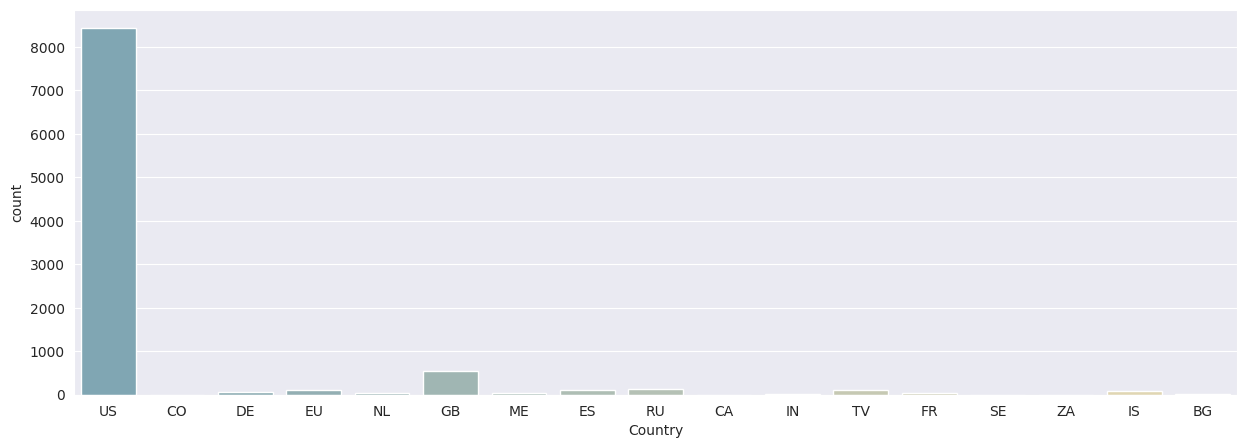

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Country',data=fake_new_df,palette='blend:#7AB,#EDA')
# Mỹ là quốc gia được sử dụng dữ liệu nhiều nhất

<ipython-input-151-cd261b41802d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Replies_count',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[0])
<ipython-input-151-cd261b41802d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Participants_count',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[1])
<ipython-input-151-cd261b41802d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Likes',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[2])
<ipython-input-151-cd261b41802d>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Comments',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[3])
<ipython-input-151-cd261b41802d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Shares',data=

<Axes: xlabel='Shares', ylabel='Count'>

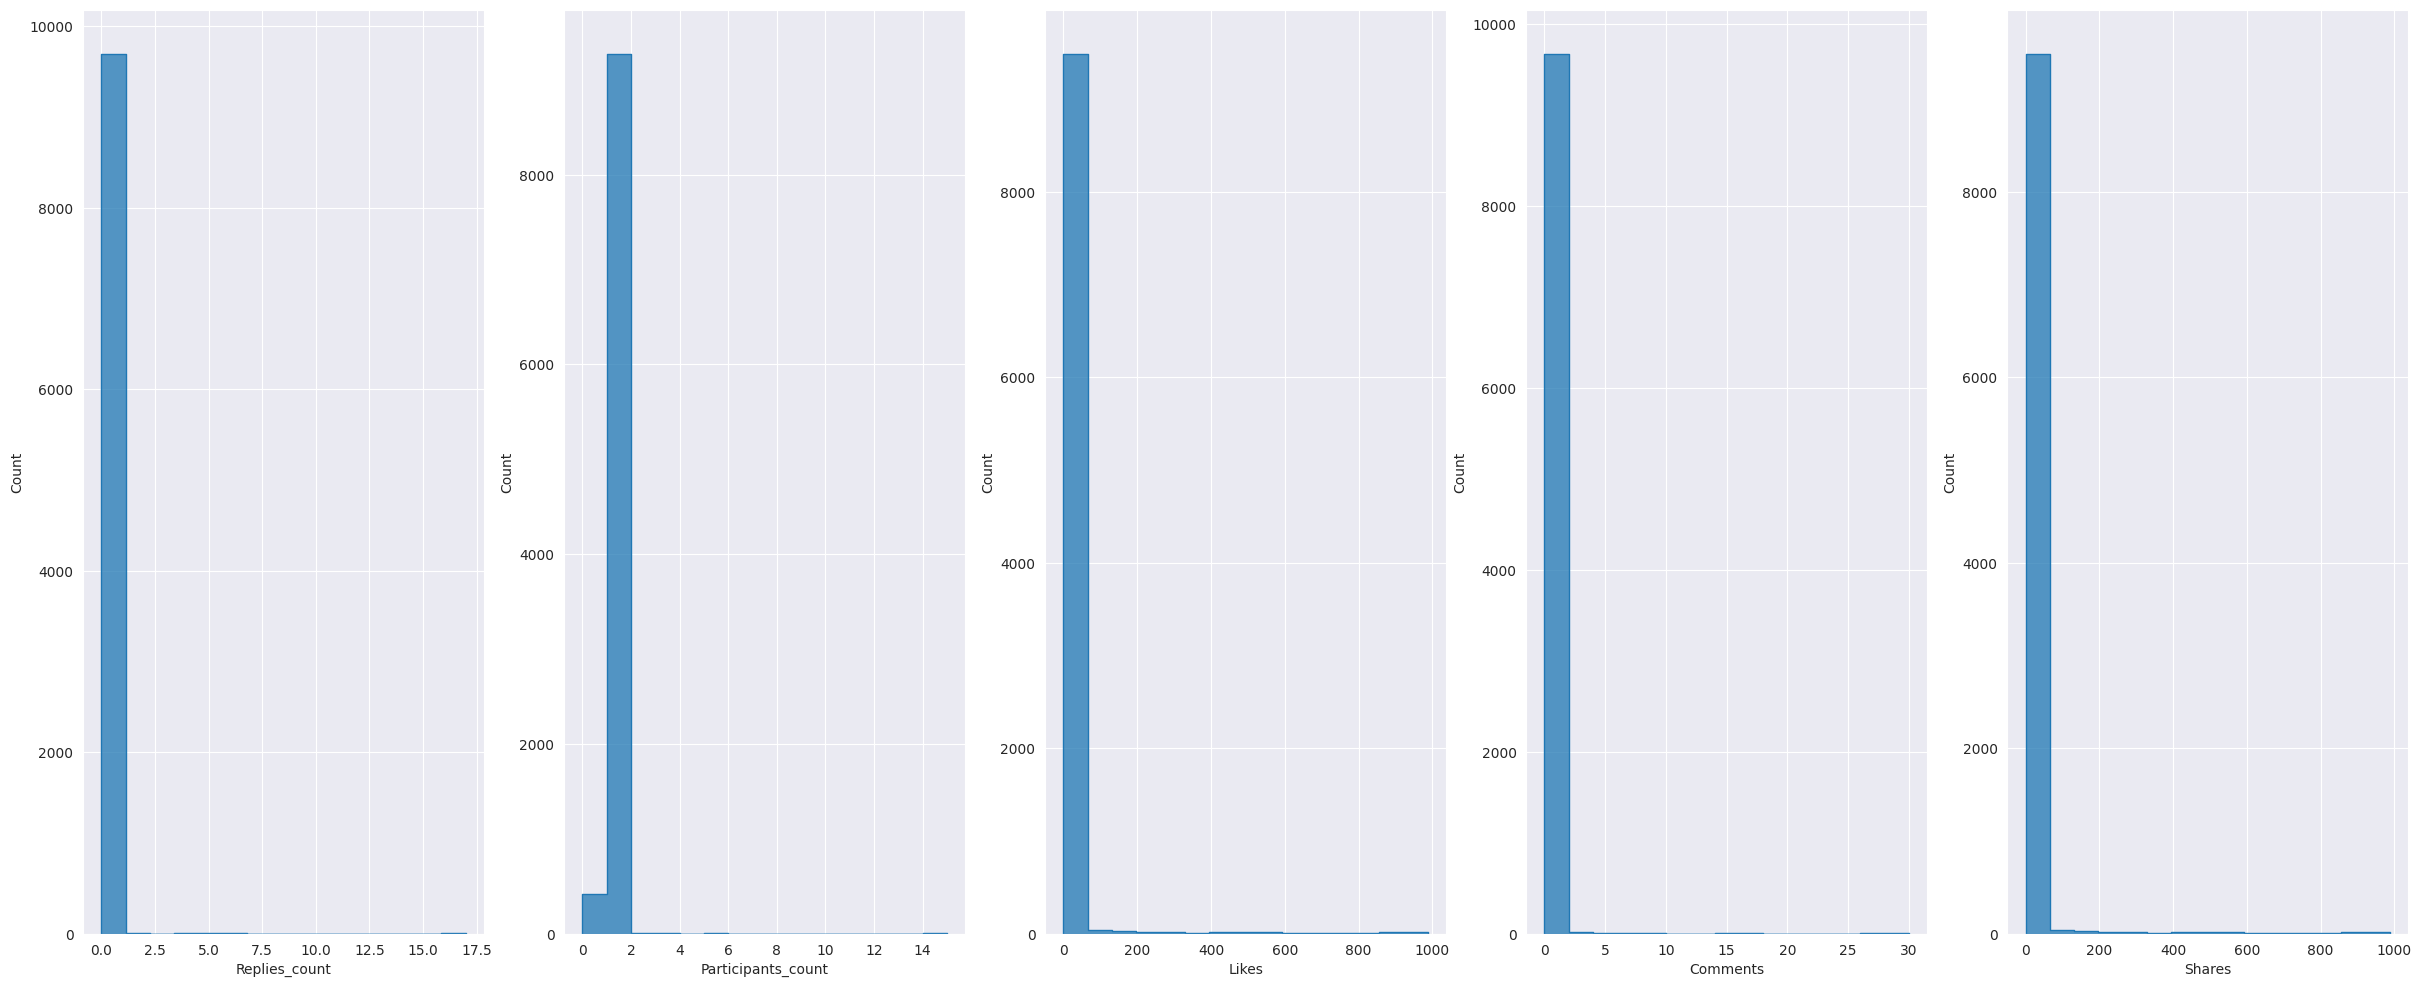

In [ ]:
# số lượng phản ứng trong bài viết
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,12))
sns.histplot(x='Replies_count',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[0])
sns.histplot(x='Participants_count',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[1])
sns.histplot(x='Likes',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[2])
sns.histplot(x='Comments',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[3])
sns.histplot(x='Shares',data=fake_new_df,element='step',palette='ch:s=.25,rot=-.25',ax=ax[4])
# Đa số người dùng ít phản hồi lại bài viết

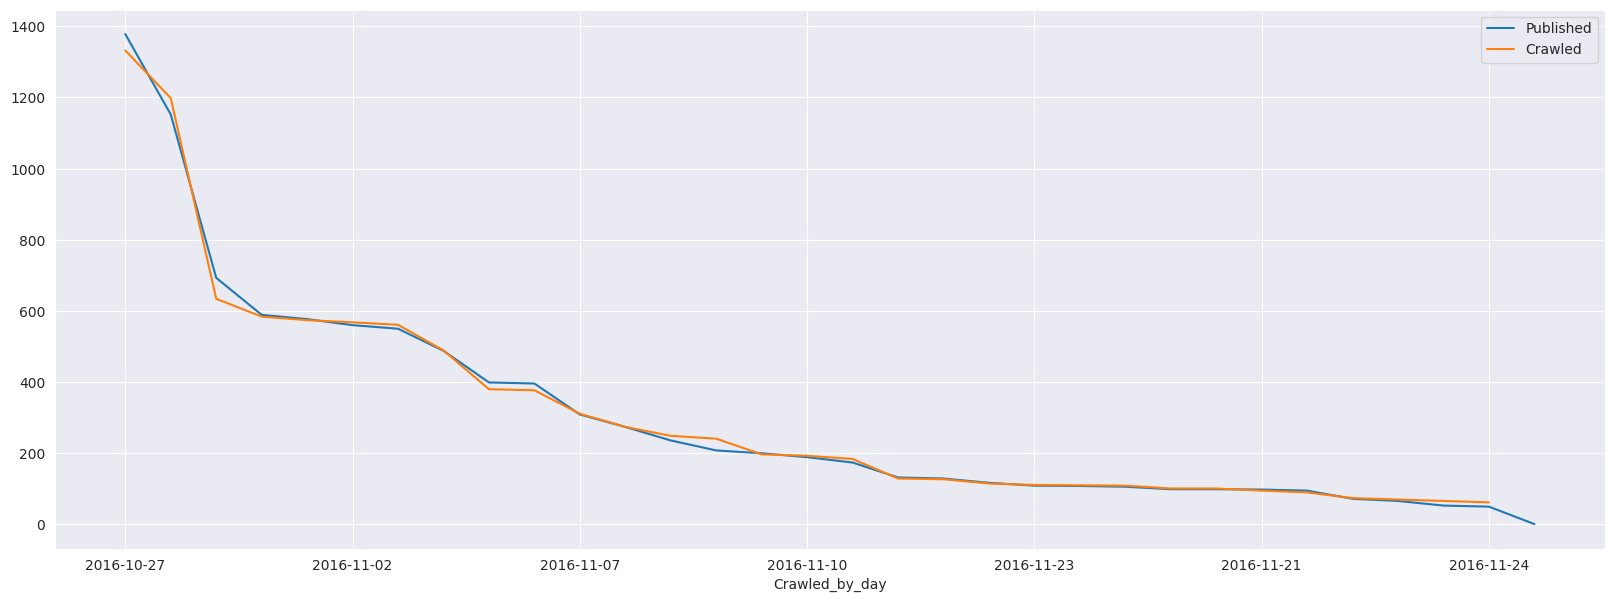

In [ ]:
# xuất bản và thu thập thông tin theo thời gian
plt.figure(figsize=(20,7))
fake_new_df['Published_by_day'].value_counts().plot(kind='line',label='Published')
fake_new_df['Crawled_by_day'].value_counts().plot(kind='line',label='Crawled')
plt.legend()
# ngày xuất bản và thu thập thông tin giảm dần theo thời gian

<ipython-input-153-ca20865503e9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Published_by_day',y='Spam_score',data=fake_new_df,ci=None)
<ipython-input-153-ca20865503e9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Crawled_by_day',y='Spam_score',data=fake_new_df,ci=None)


Text(0.5, 0, 'day')

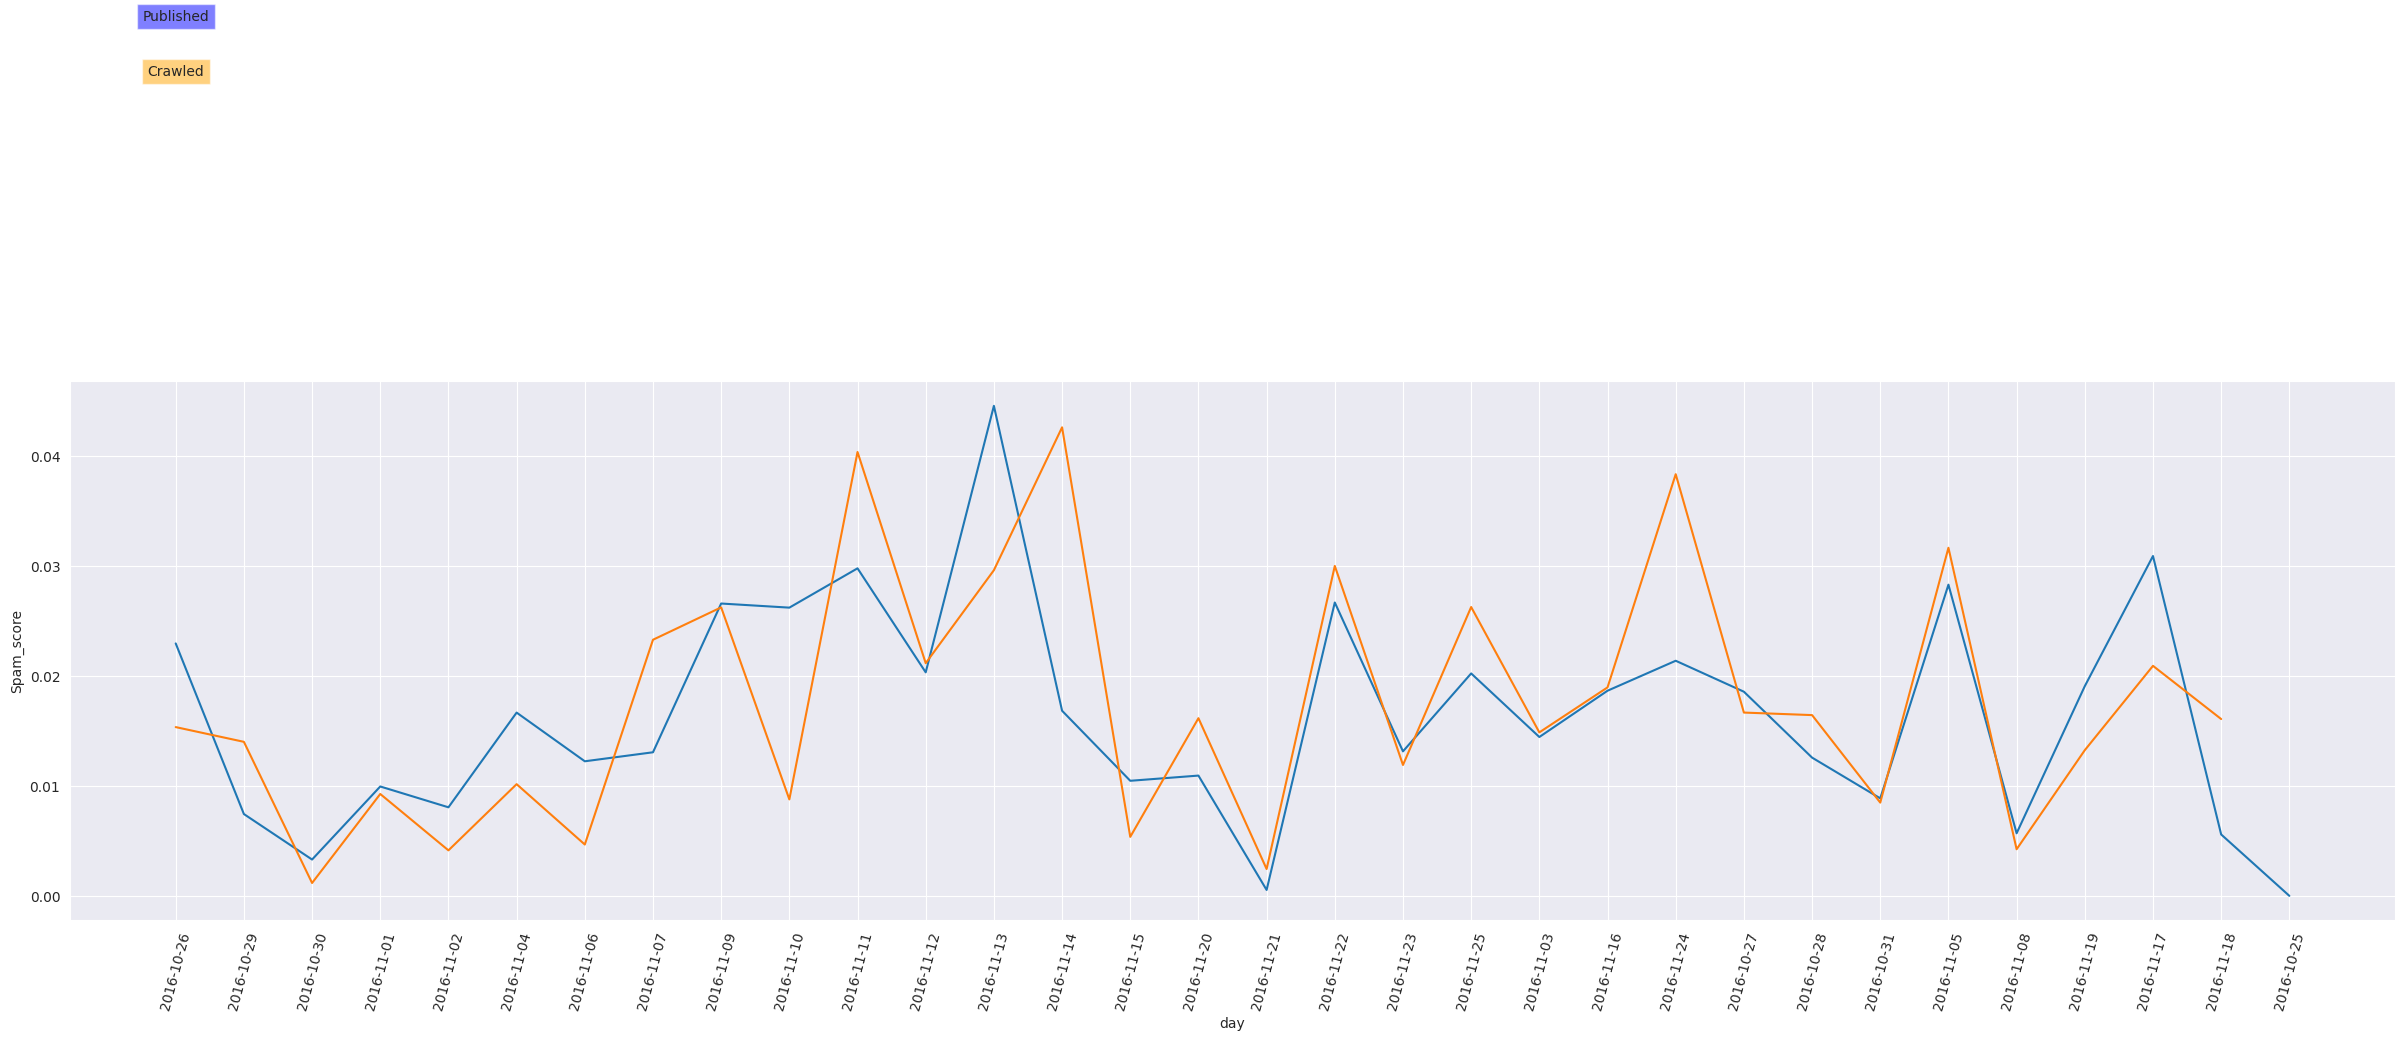

In [ ]:
# điểm thư rác theo thời gian
plt.figure(figsize=(30,7))
plt.xticks(rotation=75)
sns.lineplot(x='Published_by_day',y='Spam_score',data=fake_new_df,ci=None)
sns.lineplot(x='Crawled_by_day',y='Spam_score',data=fake_new_df,ci=None)
plt.text(0,0.08,'Published', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='blue', alpha=0.5))
plt.text(0,0.075,'Crawled', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='orange', alpha=0.5))
plt.xlabel('day')
# ngày thu thập dữ liệu lớn hơn ngày xuất bản nhưng không phải trong tất cả các ngày
# cả ngày xuất bản và thu thập dữ liệu đều tăng từ ngày 7-11 đến ngày 23-11

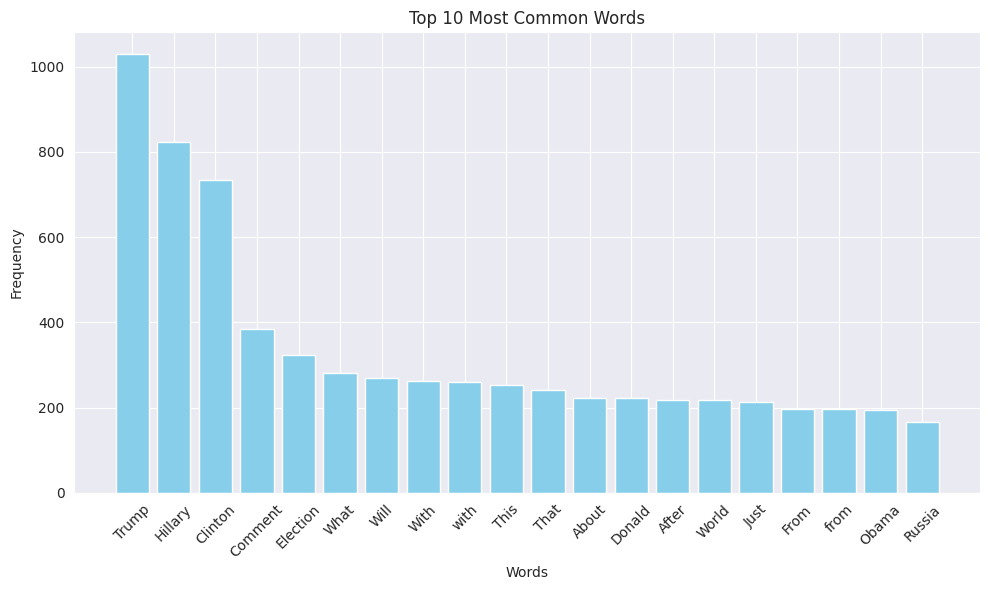

In [ ]:
# Tạo một danh sách chứa tất cả các từ trong các văn bản
all_words = [word for sentence in fake_new_df['Title'] for word in sentence.split() if len(word) >= 4]

# Đếm tần suất xuất hiện của mỗi từ
word_counts = Counter(all_words)

# Lấy top 10 từ được sử dụng nhiều nhất
top_words = word_counts.most_common(20)

# Tách ra các từ và tần suất xuất hiện
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Ở đây chúng ta có thể nhận thấy rằng hầu hết chủ đề được quan tâm là "Trump", "Hillary" và "Clinton"
# do cuộc bầu cử Tổng thống thứ 40 của Hoa Kỳ nhằm truyền bá những tuyên truyền sai trái chống lại ông sau này.

In [ ]:
# Tính số lần xuất hiện của từ khóa trong tiêu đề
keyword = "War"
fake_new_df['Keyword_in_title'] = fake_new_df['Title'].apply(lambda x: keyword.lower() in x.lower())

# Tính số lần xuất hiện của từ khóa trong nội dung
fake_new_df['Keyword_in_text'] = fake_new_df['Text'].apply(lambda x: keyword.lower() in x.lower())

# Số lần từ khóa xuất hiện trong tiêu đề và nội dung
keyword_count_title = fake_new_df['Keyword_in_title'].sum()
keyword_count_text = fake_new_df['Keyword_in_text'].sum()

print(f"Số lần từ khóa '{keyword}' xuất hiện trong tiêu đề: {keyword_count_title}")
print(f"Số lần từ khóa '{keyword}' xuất hiện trong nội dung: {keyword_count_text}")

Số lần từ khóa 'War' xuất hiện trong tiêu đề: 565
Số lần từ khóa 'War' xuất hiện trong nội dung: 4926


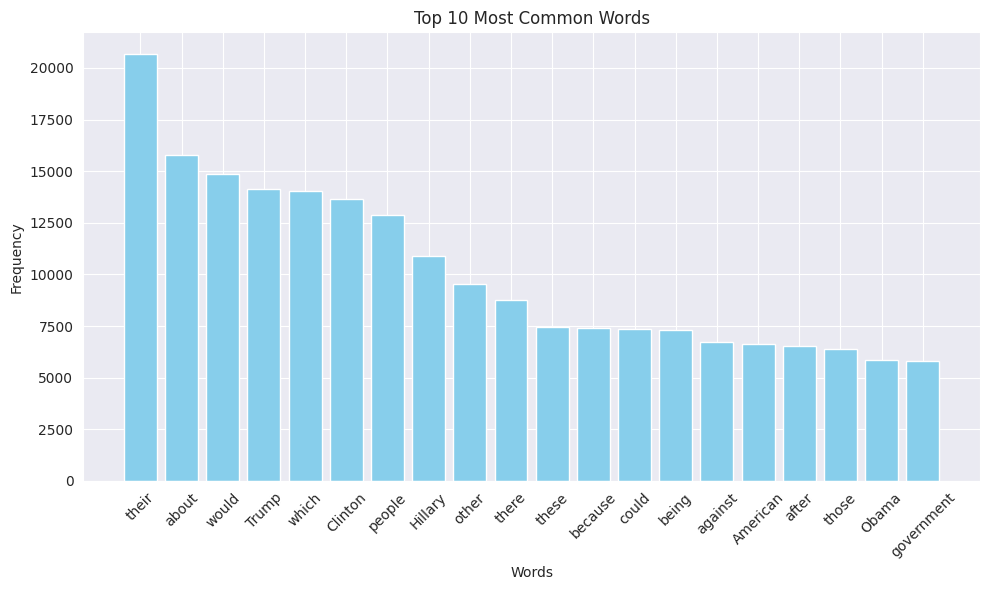

In [ ]:
# Tạo một danh sách chứa tất cả các từ trong các văn bản
all_words = [word for sentence in fake_new_df['Text'] for word in sentence.split() if len(word) >= 5]

# Đếm tần suất xuất hiện của mỗi từ
word_counts = Counter(all_words)

# Lấy top 10 từ được sử dụng nhiều nhất
top_words = word_counts.most_common(20)

# Tách ra các từ và tần suất xuất hiện
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


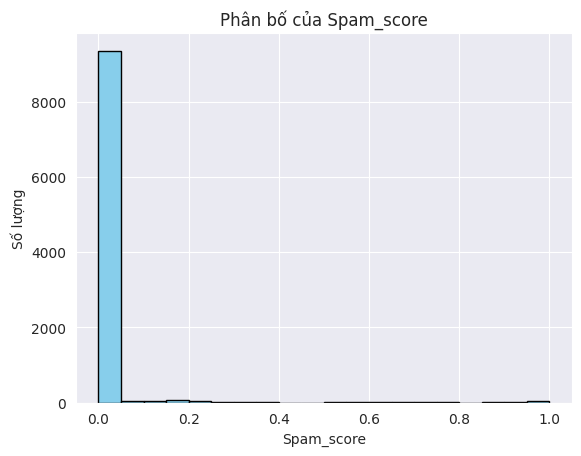

In [ ]:
# Phân tích phân bố của biến Spam_score
plt.hist(fake_new_df['Spam_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân bố của Spam_score')
plt.xlabel('Spam_score')
plt.ylabel('Số lượng')
plt.show()

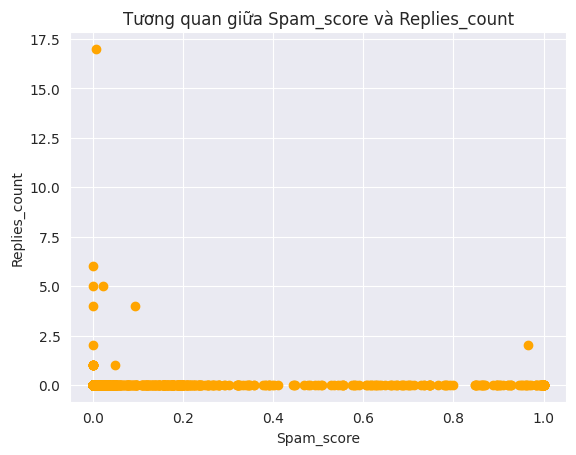

In [ ]:
# Phân tích tương quan giữa Spam_score và Replies_count
plt.scatter(fake_new_df['Spam_score'], fake_new_df['Replies_count'], color='orange')
plt.title('Tương quan giữa Spam_score và Replies_count')
plt.xlabel('Spam_score')
plt.ylabel('Replies_count')
plt.show()

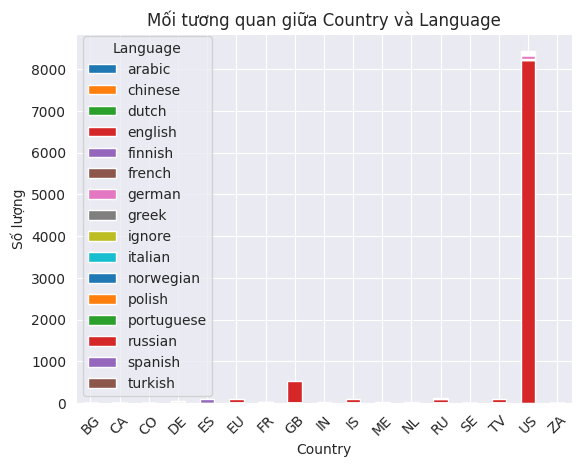

In [ ]:
# Phân tích mối tương quan giữa Country và Language
cross_tab = pd.crosstab(fake_new_df['Country'], fake_new_df['Language'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Mối tương quan giữa Country và Language')
plt.xlabel('Country')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

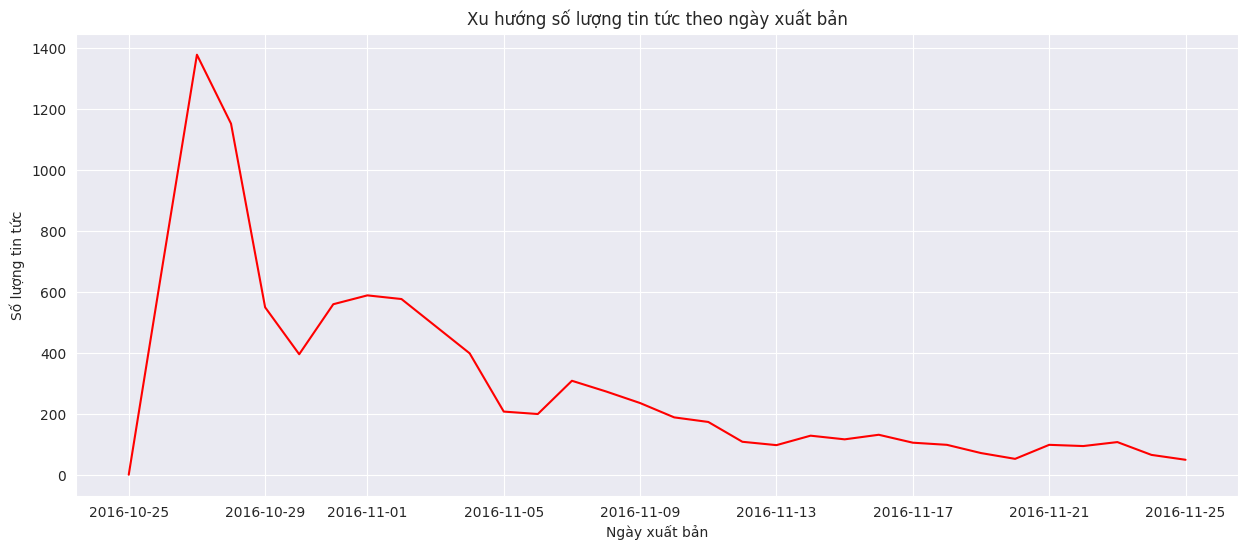

In [ ]:
# Phân tích xu hướng số lượng tin tức theo ngày xuất bản
plt.figure(figsize=(15, 6))
fake_new_df['Published'] = pd.to_datetime(fake_new_df['Published'])
fake_new_df['Published_date'] = fake_new_df['Published'].dt.date
daily_news_count = fake_new_df.groupby('Published_date').size()
daily_news_count.plot(kind='line', color='red')
plt.title('Xu hướng số lượng tin tức theo ngày xuất bản')
plt.xlabel('Ngày xuất bản')
plt.ylabel('Số lượng tin tức')
plt.show()

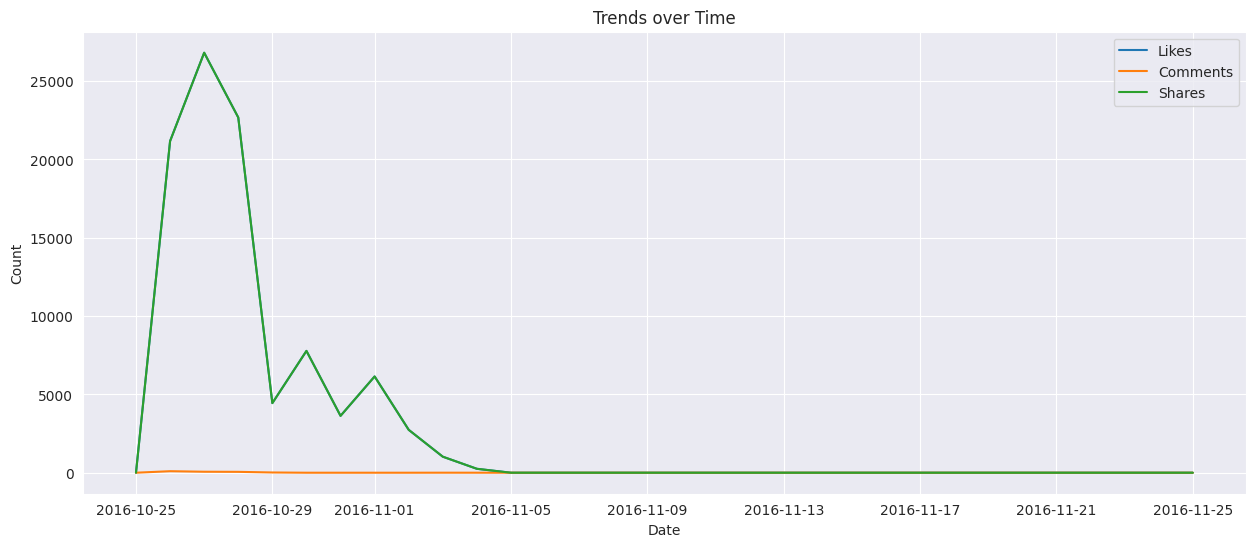

In [ ]:
# Đặt cột Published làm chỉ mục
fake_new_df.set_index('Published', inplace=True)

# Resample theo ngày và tính tổng lượt like, comment, share
daily_activity = fake_new_df.resample('D').agg({'Likes': 'sum', 'Comments': 'sum', 'Shares': 'sum'})

# Vẽ biểu đồ xu hướng
plt.figure(figsize=(15, 6))
plt.plot(daily_activity.index, daily_activity['Likes'], label='Likes')
plt.plot(daily_activity.index, daily_activity['Comments'], label='Comments')
plt.plot(daily_activity.index, daily_activity['Shares'], label='Shares')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trends over Time')
plt.legend()
plt.show()


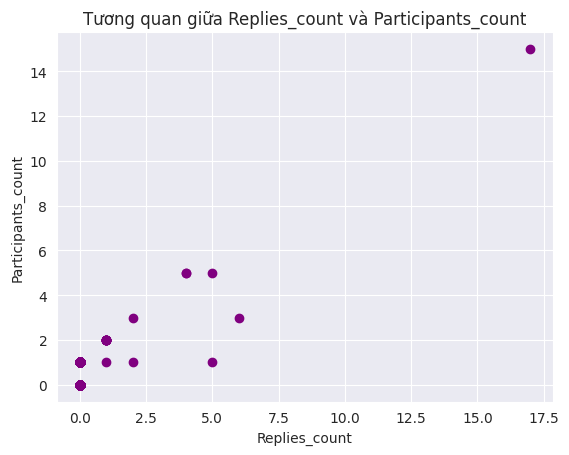

In [ ]:
# Phân tích mối tương quan giữa Replies_count và Participants_count
plt.scatter(fake_new_df['Replies_count'], fake_new_df['Participants_count'], color='purple')
plt.title('Tương quan giữa Replies_count và Participants_count')
plt.xlabel('Replies_count')
plt.ylabel('Participants_count')
plt.show()

# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

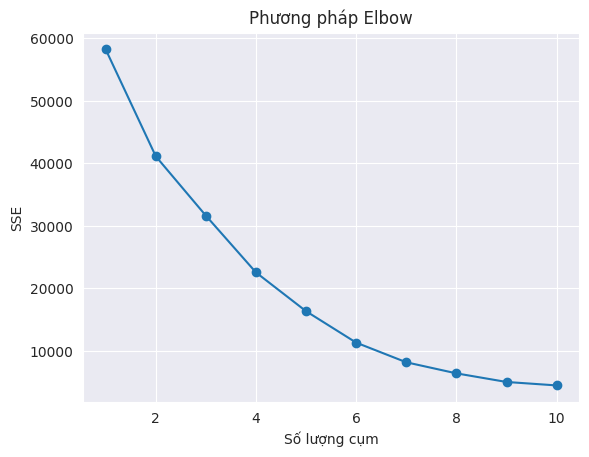

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Chọn các biến để sử dụng cho việc phân cụm
data_for_clustering = fake_new_df[['Spam_score', 'Replies_count', 'Participants_count', 'Likes', 'Comments', 'Shares']]

X = pd.get_dummies(data_for_clustering)
columns=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)

# Tìm số cụm tối ưu sử dụng phương pháp Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(X)
    sse.append(kmeans.inertia_)
# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()


# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 5
# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=123)
kmeans.fit(X)

# Gán nhãn cụm cho dữ liệu
X['Cluster'] = kmeans.labels_

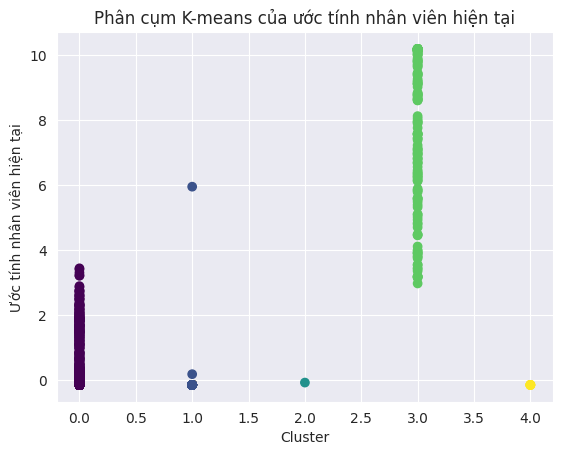

In [ ]:
# Current_employee_estimate
plt.scatter(X['Cluster'], X['Spam_score'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Ước tính nhân viên hiện tại')
plt.title('Phân cụm K-means của ước tính nhân viên hiện tại')
plt.show()

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Center found by scikit-learn:
 [[-1.14405481e-01 -1.13841465e-02  2.62011987e-02 -1.03193539e-01
  -3.22083264e-02 -1.03193539e-01  4.03149736e-15]
 [ 7.42927180e+00  3.79526631e-02 -2.27510002e+00 -1.12663148e-01
  -4.27259059e-02 -1.12663148e-01  3.00000000e+00]
 [-1.00125996e-01  1.77210455e-01  2.79360458e-01  8.18966355e+00
   1.06301330e+00  8.18966355e+00  1.00000000e+00]
 [-1.55074958e-01 -2.70898986e-02  1.48396750e-01  6.42091473e+00
   3.71737292e+01  6.42091473e+00  4.00000000e+00]
 [-8.27225469e-02  8.12435909e+01  5.37780350e+01  5.09249505e-04
  -4.27259059e-02  5.09249505e-04  2.00000000e+00]]


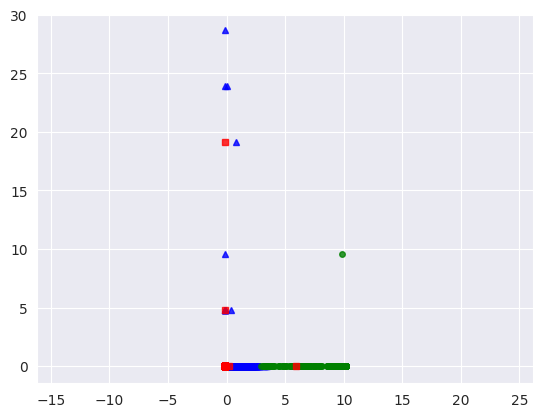

In [ ]:
# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 5
# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=123).fit(X)

print("Center found by scikit-learn:\n", kmeans.cluster_centers_)

pred_label = kmeans.predict(X)

kmeans_display(X.values, pred_label)

# **Support Vector Machine**

In [ ]:
# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = fake_new_df[['Spam_score', 'Replies_count', 'Participants_count', 'Likes', 'Comments', 'Shares']]
y = fake_new_df['Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gộp features và nhãn lại thành một DataFrame cho mỗi tập tin
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Lưu tập traindata và testdata
train_data.to_csv("TrainData.csv", index=False)
test_data.to_csv("TestData.csv", index=False)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# # Sử dụng mô hình học máy để phân loại tin tức là thật hay giả
# # Chuẩn bị dữ liệu
# X = fake_new_df['Text']
# y = fake_new_df['Type']  # Giả sử cột 'Type' chứa nhãn của tin tức (thật hoặc giả)

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuyển đổi văn bản thành vectơ TF-IDF
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_predSVM = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_predSVM))

# Tính độ chính xác
accuracySVM = accuracy_score(y_test, y_predSVM)
print("Độ chính xác: ",accuracySVM)

# Tính Precision
precisionSVM = precision_score(y_test, y_predSVM, average='weighted')
print("Precision:", precisionSVM)

#Tính Recall
recallSVM = recall_score(y_test, y_predSVM, average='weighted')
print("Recall:", recallSVM)

#Tính F1-score
f1SVM = f1_score(y_test, y_predSVM, average='weighted')
print("F1-score:", f1SVM)

              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      1.00      0.95      1741
  conspiracy       0.00      0.00      0.00        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.00      0.00      0.00        21
       state       0.00      0.00      0.00         1

    accuracy                           0.90      1942
   macro avg       0.13      0.14      0.14      1942
weighted avg       0.80      0.90      0.85      1942

Độ chính xác:  0.8964984552008239
Precision: 0.8037094801774637
Recall: 0.8964984552008239
F1-score: 0.8475719850690385


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# **Decision Trees**

In [ ]:
# Huấn luyện mô hình cây quyết định
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_predDT = decision_tree.predict(X_test_scaled)
print(classification_report(y_test, y_predDT))

# Tính độ chính xác
accuracyDT = accuracy_score(y_test, y_predDT)
print("Độ chính xác: ",accuracyDT)

# Tính Precision
precisionDT = precision_score(y_test, y_predDT, average='weighted')
print("Precision:", precisionDT)

#Tính Recall
recallDT = recall_score(y_test, y_predDT, average='weighted')
print("Recall:", recallDT)

#Tính F1-score
f1DT = f1_score(y_test, y_predDT, average='weighted')
print("F1-score:", f1DT)

              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      0.99      0.94      1741
  conspiracy       0.27      0.08      0.12        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.31      0.19      0.24        21
       state       0.00      0.00      0.00         1

    accuracy                           0.89      1942
   macro avg       0.21      0.18      0.19      1942
weighted avg       0.82      0.89      0.85      1942

Độ chính xác:  0.8908341915550978
Precision: 0.8202833083632294
Recall: 0.8908341915550978
F1-score: 0.8523249872145421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# **K-Nearest Neighbors**

In [ ]:
# Khởi tạo và huấn luyện mô hình KNN với số láng giềng k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_predKNN = knn.predict(X_test_scaled)

# Đánh giá mô hình KNN
print("KNN Model Evaluation:")
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))


# Tính độ chính xác
accuracyKNN = accuracy_score(y_test, y_predKNN)
print("Accuracy:", accuracyKNN)

# Tính Precision
precisionKNN = precision_score(y_test, y_predKNN, average='weighted')
print("Precision:", precisionKNN)

#Tính Recall
recallKNN = recall_score(y_test, y_predKNN, average='weighted')
print("Recall:", recallKNN)

#Tính F1-score
f1KNN = f1_score(y_test, y_predKNN, average='weighted')
print("F1-score:", f1KNN)

KNN Model Evaluation:
[[   0   63    0    0    0    0    0]
 [   3 1728    2    0    0    8    0]
 [   0   49    1    0    0    1    0]
 [   0    3    0    0    0    0    0]
 [   0   62    0    0    0    0    0]
 [   1   12    3    0    0    5    0]
 [   0    1    0    0    0    0    0]]
              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      0.99      0.94      1741
  conspiracy       0.17      0.02      0.04        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.36      0.24      0.29        21
       state       0.00      0.00      0.00         1

    accuracy                           0.89      1942
   macro avg       0.20      0.18      0.18      1942
weighted avg       0.82      0.89      0.85      1942

Accuracy: 0.8928939237899073
Precision: 0.8159288823214192
Recall: 0.8928939237899073
F1-score: 0.850772101831851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# **Naive-Bayes**

In [ ]:
# Khởi tạo mô hình Naive-Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_predNB = nb_model.predict(X_test)

# Đánh giá mô hình Naive-Bayes trên tập kiểm tra
print("Naive-Bayes Model Evaluation on Test Data:")
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# Tính độ chính xác
accuracyNB = accuracy_score(y_test, y_predNB)
print("Accuracy:", accuracyNB)

# Tính Precision
precisionNB = precision_score(y_test, y_predNB, average='weighted')
print("Precision:", precisionNB)

#Tính Recall
recallNB = recall_score(y_test, y_predNB, average='weighted')
print("Recall:", recallNB)

#Tính F1-score
f1NB = f1_score(y_test, y_predNB, average='weighted')
print("F1-score:", f1NB)

Naive-Bayes Model Evaluation on Test Data:
[[   0    4    0    1    0    2   56]
 [  18   64    4   24   16   24 1591]
 [   2    0    0    1    2    7   39]
 [   0    0    0    0    0    0    3]
 [   0    0    0    0    0    0   62]
 [   0    0    0    0    0   16    5]
 [   0    0    0    0    0    0    1]]
              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.94      0.04      0.07      1741
  conspiracy       0.00      0.00      0.00        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.33      0.76      0.46        21
       state       0.00      1.00      0.00         1

    accuracy                           0.04      1942
   macro avg       0.18      0.26      0.08      1942
weighted avg       0.85      0.04      0.07      1942

Accuracy: 0.04170957775489186
Precision: 0.8472945145742657
Recall: 0.04170957775489186
F1-sc

# **Logistic Regression**

In [ ]:
LR=LogisticRegression()
model_LR=LR.fit(X_train, y_train)
y_predLR=model_LR.predict(X_test)
print(classification_report(y_test, y_predLR))

# Tính độ chính xác
accuracyLR = accuracy_score(y_test, y_predLR)
print("Accuracy:", accuracyLR)

# Tính Precision
precisionLR = precision_score(y_test, y_predLR, average='weighted')
print("Precision:", precisionLR)

#Tính Recall
recallLR = recall_score(y_test, y_predLR, average='weighted')
print("Recall:", recallLR)

#Tính F1-score
f1LR = f1_score(y_test, y_predLR, average='weighted')
print("F1-score:", f1LR)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      1.00      0.95      1741
  conspiracy       0.00      0.00      0.00        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.33      0.14      0.20        21
       state       0.00      0.00      0.00         1

    accuracy                           0.90      1942
   macro avg       0.18      0.16      0.16      1942
weighted avg       0.81      0.90      0.85      1942

Accuracy: 0.8954685890834192
Precision: 0.8087371326673213
Recall: 0.8954685890834192
F1-score: 0.8493708398202191


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

In [ ]:
RFC=RandomForestClassifier(random_state=0)
model_RFC=RFC.fit(X_train, y_train)
y_predRFC=model_RFC.predict(X_test)
print(classification_report(y_test, y_predRFC))

# Tính độ chính xác
accuracyRFC = accuracy_score(y_test, y_predRFC)
print("Accuracy:", accuracyRFC)

# Tính Precision
precisionRFC = precision_score(y_test, y_predRFC, average='weighted')
print("Precision:", precisionRFC)

#Tính Recall
recallRFC = recall_score(y_test, y_predRFC, average='weighted')
print("Recall:", recallRFC)

#Tính F1-score
f1RFC = f1_score(y_test, y_predRFC, average='weighted')
print("F1-score:", f1RFC)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      0.99      0.95      1741
  conspiracy       0.25      0.06      0.10        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.29      0.19      0.23        21
       state       0.00      0.00      0.00         1

    accuracy                           0.89      1942
   macro avg       0.21      0.18      0.18      1942
weighted avg       0.82      0.89      0.85      1942

Accuracy: 0.892378990731205
Precision: 0.8197892009640841
Recall: 0.892378990731205
F1-score: 0.8526070377529327


# **Gradient Boosting Machine**

In [ ]:
GBC=GradientBoostingClassifier(random_state=0)
model_GBC=GBC.fit(X_train, y_train)
y_predGBC=model_GBC.predict(X_test)
print(classification_report(y_test, y_predGBC))

# Tính độ chính xác
accuracyGBC = accuracy_score(y_test, y_predGBC)
print("Accuracy:", accuracyGBC)

# Tính Precision
precisionGBC = precision_score(y_test, y_predGBC, average='weighted')
print("Precision:", precisionGBC)

#Tính Recall
recallGBC = recall_score(y_test, y_predGBC, average='weighted')
print("Recall:", recallGBC)

#Tính F1-score
f1GBC = f1_score(y_test, y_predGBC, average='weighted')
print("F1-score:", f1GBC)

              precision    recall  f1-score   support

        bias       0.00      0.00      0.00        63
          bs       0.90      0.99      0.94      1741
  conspiracy       0.29      0.08      0.12        51
        fake       0.00      0.00      0.00         3
        hate       0.00      0.00      0.00        62
     junksci       0.31      0.19      0.24        21
       state       0.00      0.00      0.00         1

    accuracy                           0.89      1942
   macro avg       0.21      0.18      0.19      1942
weighted avg       0.82      0.89      0.85      1942

Accuracy: 0.8918640576725025
Precision: 0.8208742475983019
Recall: 0.8918640576725025
F1-score: 0.8528926770632911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# **So sánh giữa các Model**


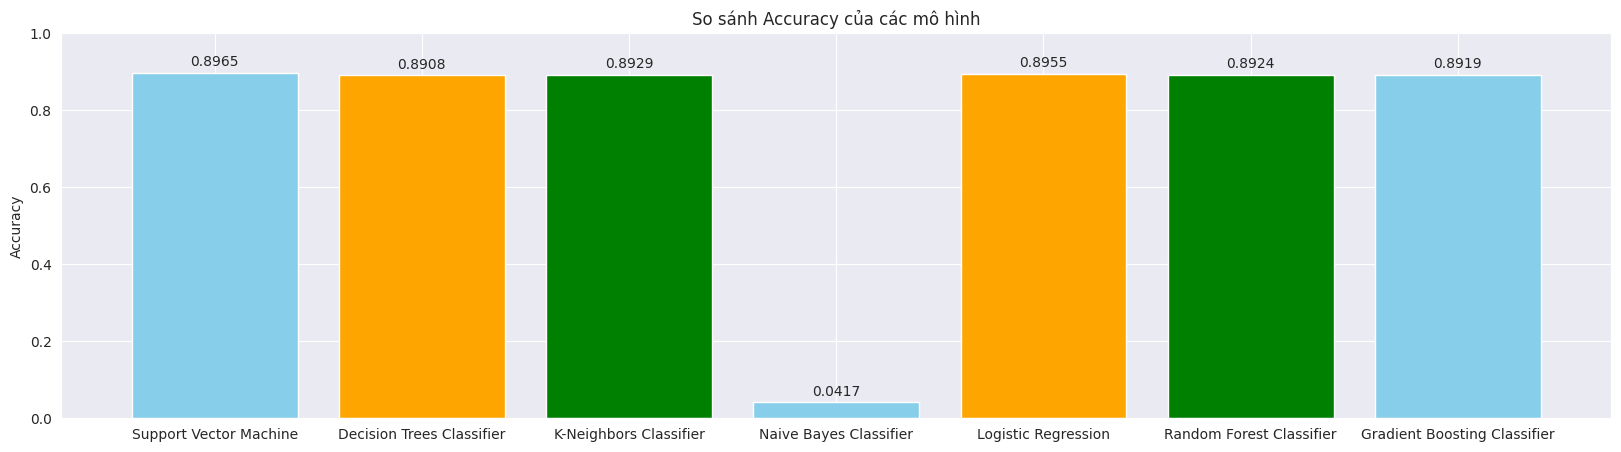

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(['Support Vector Machine', 'Decision Trees Classifier','K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
 [accuracySVM, accuracyDT, accuracyKNN, accuracyNB, accuracyLR, accuracyRFC, accuracyGBC], color=['skyblue', 'orange', 'green'])
plt.title('So sánh Accuracy của các mô hình')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Thêm giá trị của từng cột vào hình
for i in range(len(['Support Vector Machine', 'Decision Trees Classifier', 'K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression','Random Forest Classifier', 'Gradient Boosting Classifier'])):
    plt.text(i, [accuracySVM, accuracyDT, accuracyKNN, accuracyNB, accuracyLR, accuracyRFC, accuracyGBC][i] + 0.01,
             round([accuracySVM, accuracyDT, accuracyKNN, accuracyNB, accuracyLR, accuracyRFC, accuracyGBC][i], 4),
             ha='center', va='bottom')
plt.show()

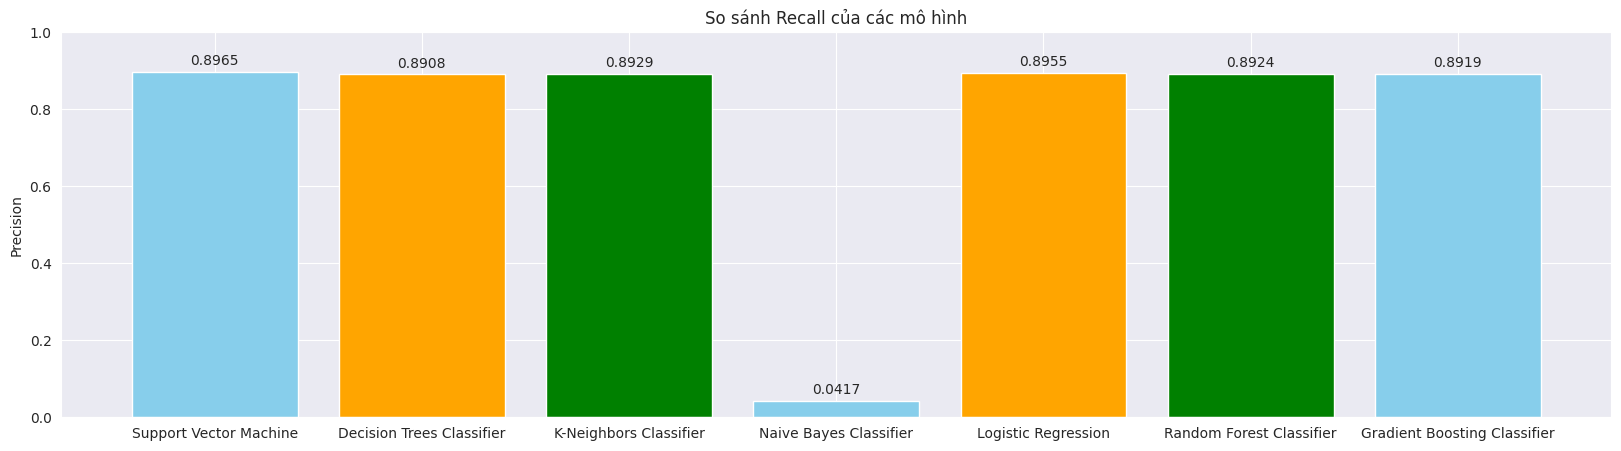

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(['Support Vector Machine', 'Decision Trees Classifier','K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
 [recallSVM, recallDT, recallKNN, recallNB, recallLR, recallRFC, recallGBC], color=['skyblue', 'orange', 'green'])
plt.title('So sánh Recall của các mô hình')
plt.ylabel('Precision')
plt.ylim(0, 1)

# Thêm giá trị của từng cột vào hình
for i in range(len(['Support Vector Machine', 'Decision Trees Classifier', 'K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression','Random Forest Classifier', 'Gradient Boosting Classifier'])):
    plt.text(i, [recallSVM, recallDT, recallKNN, recallNB, recallLR, recallRFC, recallGBC][i] + 0.01,
             round([recallSVM, recallDT, recallKNN, recallNB, recallLR, recallRFC, recallGBC][i], 4),
             ha='center', va='bottom')
plt.show()

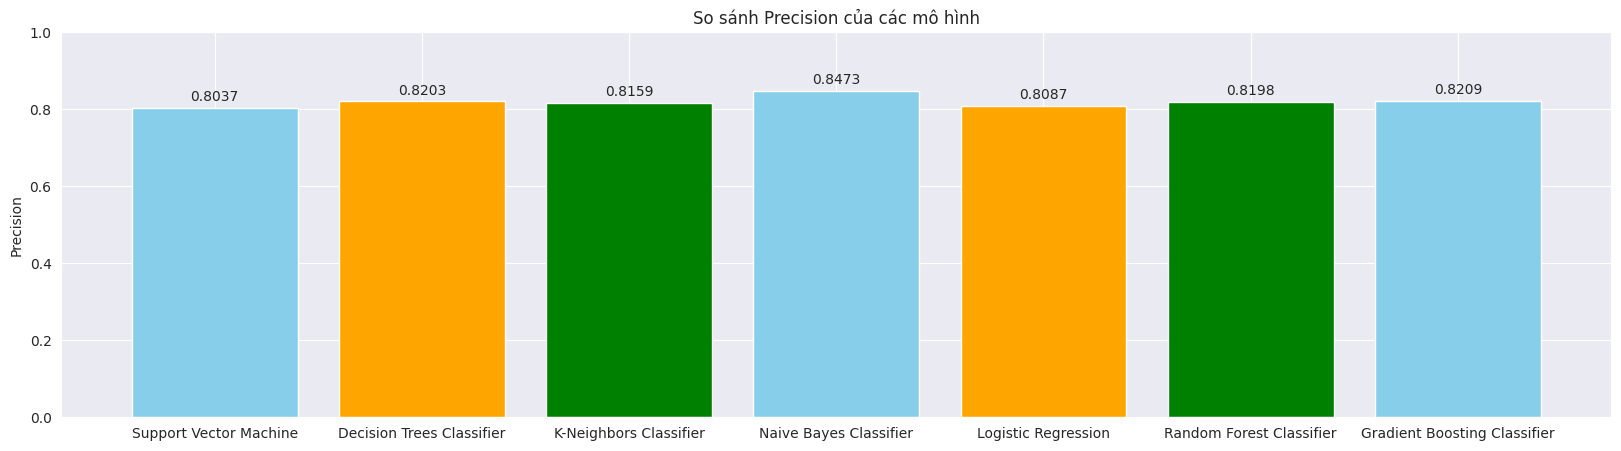

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(['Support Vector Machine', 'Decision Trees Classifier','K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
 [precisionSVM, precisionDT, precisionKNN, precisionNB, precisionLR, precisionRFC, precisionGBC], color=['skyblue', 'orange', 'green'])
plt.title('So sánh Precision của các mô hình')
plt.ylabel('Precision')
plt.ylim(0, 1)

# Thêm giá trị của từng cột vào hình
for i in range(len(['Support Vector Machine', 'Decision Trees Classifier', 'K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression','Random Forest Classifier', 'Gradient Boosting Classifier'])):
    plt.text(i, [precisionSVM, precisionDT, precisionKNN, precisionNB, precisionLR, precisionRFC, precisionGBC][i] + 0.01,
             round([precisionSVM, precisionDT, precisionKNN, precisionNB, precisionLR, precisionRFC, precisionGBC][i], 4),
             ha='center', va='bottom')
plt.show()

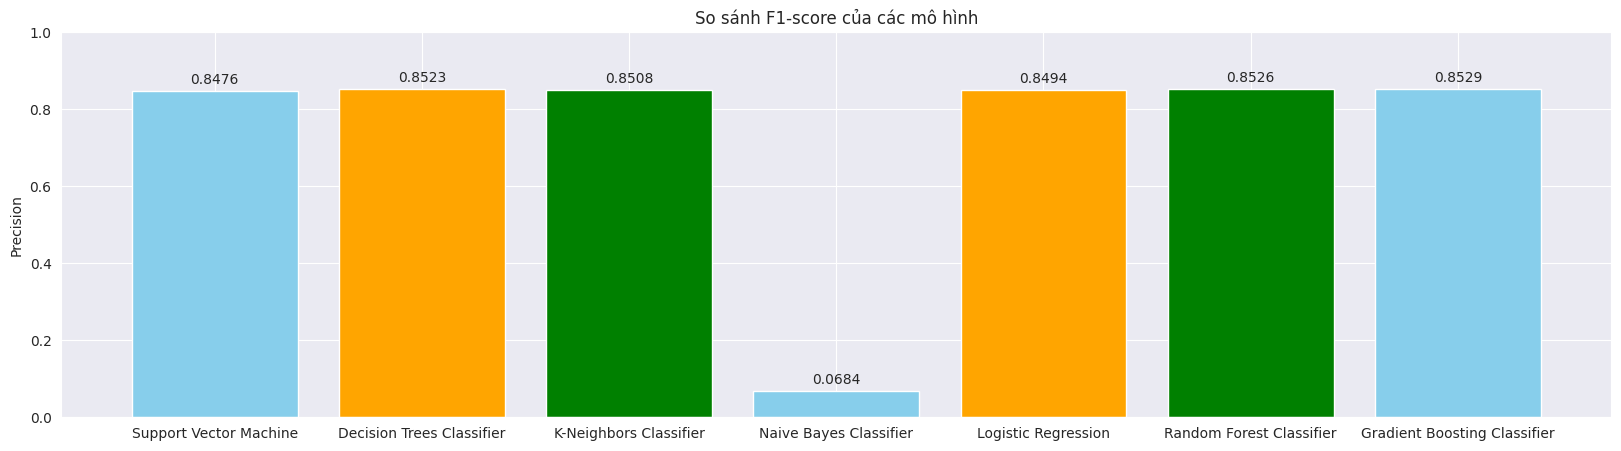

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(['Support Vector Machine', 'Decision Trees Classifier','K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
 [f1SVM, f1DT, f1KNN, f1NB, f1LR, f1RFC, f1GBC], color=['skyblue', 'orange', 'green'])
plt.title('So sánh F1-score của các mô hình')
plt.ylabel('Precision')
plt.ylim(0, 1)

# Thêm giá trị của từng cột vào hình
for i in range(len(['Support Vector Machine', 'Decision Trees Classifier', 'K-Neighbors Classifier', 'Naive Bayes Classifier', 'Logistic Regression','Random Forest Classifier', 'Gradient Boosting Classifier'])):
    plt.text(i, [f1SVM, f1DT, f1KNN, f1NB, f1LR, f1RFC, f1GBC][i] + 0.01,
             round([f1SVM, f1DT, f1KNN, f1NB, f1LR, f1RFC, f1GBC][i], 4),
             ha='center', va='bottom')
plt.show()